In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset 

In [3]:
ds=pd.read_csv("data/TrainAndValid.csv",low_memory=False)
ds.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,...,11500.0,13000.0,20500.0,13000.0,10000.0,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00,12/18/2008 0:00,8/26/2004 0:00,11/17/2005 0:00,8/27/2009 0:00,8/9/2007 0:00,...,2/13/2012 0:00,1/28/2012 0:00,1/28/2012 0:00,1/28/2012 0:00,2/13/2012 0:00,3/7/2012 0:00,1/28/2012 0:00,1/28/2012 0:00,3/7/2012 0:00,1/28/2012 0:00


## Make a copy of data

In [4]:
ds_copy=ds.copy()

## Get the information about the data

In [5]:
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

## Get the missing value in percentage

In [6]:
mis_per=ds.isna().sum()/len(ds)*100
mis_per

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

## Store data a/c to dtypes

In [7]:
#ALL THE INT64 COLUMNS
int_fea=ds_copy.select_dtypes(include=["int64"]).columns
## Convert the series into list
int_fea=int_fea.tolist()
int_fea

['SalesID', 'MachineID', 'ModelID', 'datasource', 'YearMade']

In [8]:
#ALL THE INT64 COLUMNS
float_fea=ds_copy.select_dtypes(include=["float64"]).columns
## Convert the series into list
float_fea=float_fea.tolist()
float_fea

['SalePrice', 'auctioneerID', 'MachineHoursCurrentMeter']

In [9]:
#ALL THE INT64 COLUMNS
cat_fea=ds_copy.select_dtypes(include=["object"]).columns
## Convert the series into list
cat_fea=cat_fea.tolist()
cat_fea

['UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

## Missing data representation

<AxesSubplot:>

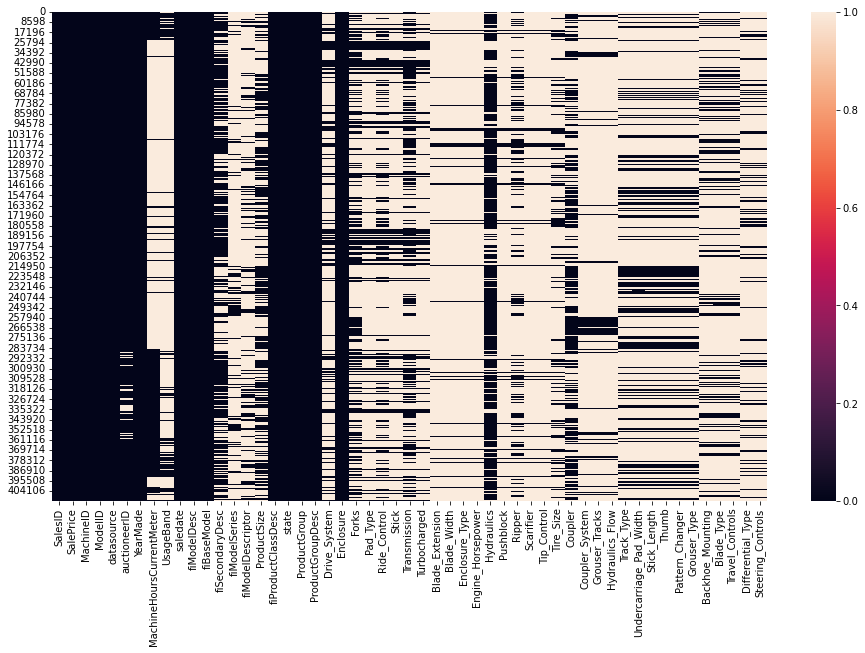

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(ds_copy.isnull())

## Store data a/c missing percentge

In [11]:
mis_per_50=mis_per[mis_per>50]
mis_20_50_per=mis_per[(mis_per>20)&(mis_per<51)]
miss_0_20_per=mis_per[(mis_per>0)&(mis_per<20)]


## Missing value 

In [12]:
mis_val_fea=mis_per[mis_per>0]
mis_val_fea
cat_na_fea=mis_val_fea[mis_val_fea.keys().isin(cat_fea)]
cat_na_fea

UsageBand                  82.149174
fiSecondaryDesc            34.099269
fiModelSeries              85.784520
fiModelDescriptor          81.871490
ProductSize                52.485110
Drive_System               74.051970
Enclosure                   0.080931
Forks                      52.092087
Pad_Type                   80.349796
Ride_Control               62.992794
Stick                      80.349796
Transmission               54.444412
Turbocharged               80.349796
Blade_Extension            93.704113
Blade_Width                93.704113
Enclosure_Type             93.704113
Engine_Horsepower          93.704113
Hydraulics                 20.006155
Pushblock                  93.704113
Ripper                     74.086378
Scarifier                  93.701448
Tip_Control                93.704113
Tire_Size                  76.341538
Coupler                    46.527727
Coupler_System             89.102443
Grouser_Tracks             89.126431
Hydraulics_Flow            89.126431
T

In [13]:
int_na_fea=mis_val_fea[mis_val_fea.keys().isin(int_fea)]
int_na_fea

Series([], dtype: float64)

In [14]:
float_na_fea=mis_val_fea[mis_val_fea.keys().isin(float_fea)]
float_na_fea

auctioneerID                 4.879113
MachineHoursCurrentMeter    64.258610
dtype: float64

In [15]:
ds_copy.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


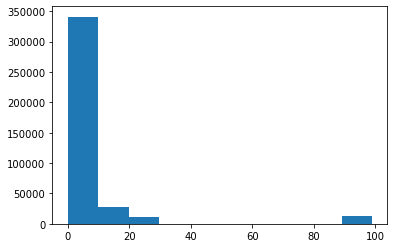

In [16]:
plt.hist(ds_copy["auctioneerID"])
plt.show()

## fill float missing data


In [17]:
ds_copy["auctioneerID"].fillna(ds_copy["auctioneerID"].mean(),inplace=True)
ds_copy["MachineHoursCurrentMeter"].fillna(ds_copy["MachineHoursCurrentMeter"].mean(),inplace=True)

In [18]:
ds_copy['Pattern_Changer'] = ds_copy['Pattern_Changer'].astype('category')


## convert all object into categorical column

In [19]:
for x in cat_fea:
    #print(x)
    ds_copy[x] = ds_copy[x].astype('category')
    

In [20]:
ds_copy["Coupler_System"].fillna(ds_copy["Coupler_System"].mode()[0],inplace=True)

In [21]:
ds_copy["Coupler_System"].isna().sum()

0

In [22]:
ds_copy['fiProductClassDesc']

0                  Wheel Loader - 110.0 to 120.0 Horsepower
1                  Wheel Loader - 150.0 to 175.0 Horsepower
2         Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...
3         Hydraulic Excavator, Track - 12.0 to 14.0 Metr...
4         Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...
                                ...                        
412693    Hydraulic Excavator, Track - 2.0 to 3.0 Metric...
412694    Hydraulic Excavator, Track - 3.0 to 4.0 Metric...
412695    Hydraulic Excavator, Track - 2.0 to 3.0 Metric...
412696    Hydraulic Excavator, Track - 2.0 to 3.0 Metric...
412697    Hydraulic Excavator, Track - 3.0 to 4.0 Metric...
Name: fiProductClassDesc, Length: 412698, dtype: category
Categories (74, object): ['Backhoe Loader - 0.0 to 14.0 Ft Standard Digg..., 'Backhoe Loader - 14.0 to 15.0 Ft Standard Dig..., 'Backhoe Loader - 15.0 to 16.0 Ft Standard Dig..., 'Backhoe Loader - 16.0 + Ft Standard Digging D..., ..., 'Wheel Loader - 60.0 to 80.0 Horsepower', 'Whee

In [23]:
ds_copy["fiProductClassDesc"].fillna(ds_copy["fiProductClassDesc"].mode()[0],inplace=True)

In [24]:
ds_copy["fiProductClassDesc"].isna().sum()

0

In [25]:
for x in cat_fea:
    ds_copy[x].fillna(ds_copy[x].mode()[0],inplace=True)
    

In [26]:
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              412698 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  412698 non-null  float64 
 8   UsageBand                 412698 non-null  category
 9   saledate                  412698 non-null  category
 10  fiModelDesc               412698 non-null  category
 11  fiBaseModel               412698 non-null  category
 12  fiSecondaryDesc           412698 non-null  category
 13  fiModelSeries             412

## split the data into training and test set

In [27]:
X=ds_copy.drop(["SalePrice"],axis=1)
Y=ds_copy["SalePrice"]

## Implement model

In [28]:
#Models from sciket-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

In [29]:
# turn the string data into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cat_fea)] ,remainder="passthrough")
#X= onehotencoder.fit_transform(x)
transformed_X=transformer.fit_transform(X)
transformed_X

<412698x11809 sparse matrix of type '<class 'numpy.float64'>'
	with 21385924 stored elements in Compressed Sparse Row format>

In [30]:
#let refit the model
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(transformed_X,Y,test_size=0.2)

In [31]:
'''#Put the modes in the dictionary
models={"LOGISTIC REGRESSION":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "RANDOM FOREST":RandomForestClassifier()}
#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    #make a dictionaryto keep the model score
    model_scores={}
    #loop through model
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train,Y_train)
        #Evaluate the models and append its score to model_Scores
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores'''  

'#Put the modes in the dictionary\nmodels={"LOGISTIC REGRESSION":LogisticRegression(),\n       "KNN":KNeighborsClassifier(),\n       "RANDOM FOREST":RandomForestClassifier()}\n#Create a function to fit and score models\ndef fit_and_score(models,X_train,X_test,Y_train,Y_test):\n    np.random.seed(42)\n    #make a dictionaryto keep the model score\n    model_scores={}\n    #loop through model\n    for name, model in models.items():\n        #fit the model to the data\n        model.fit(X_train,Y_train)\n        #Evaluate the models and append its score to model_Scores\n        model_scores[name]=model.score(X_test,Y_test)\n    return model_scores'

In [32]:
'''model_scores=fit_and_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         Y_train=Y_train,
                         Y_test=Y_test)
model_scores'''

'model_scores=fit_and_score(models=models,\n                         X_train=X_train,\n                         X_test=X_test,\n                         Y_train=Y_train,\n                         Y_test=Y_test)\nmodel_scores'

In [33]:
X_train

<330158x11809 sparse matrix of type '<class 'numpy.float64'>'
	with 17108692 stored elements in Compressed Sparse Row format>

In [34]:
pd.Categorical(ds_copy['state']).codes

array([ 0, 32, 31, ...,  8, 43,  8], dtype=int8)

In [ ]:
%%time 
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
#fit the model 
model.fit(X_train,Y_train)

In [ ]:
X